# <b> Chapter 8 

In [135]:
from typing import Callable
import matplotlib.pyplot as plt
from math import log

## Estimating the Gradient

$$
{\displaystyle f'(a)=\lim _{h\to 0}{\frac {f(a+h)-f(a)}{h}}}
$$

In [136]:
# Defining the derivative and log functions


def derivative(f: Callable, a: float, h: float) -> float:
    return (f(a + h) - f(a)) / h


def log_half(x: float) -> float:
    return log(x, 1e-2)

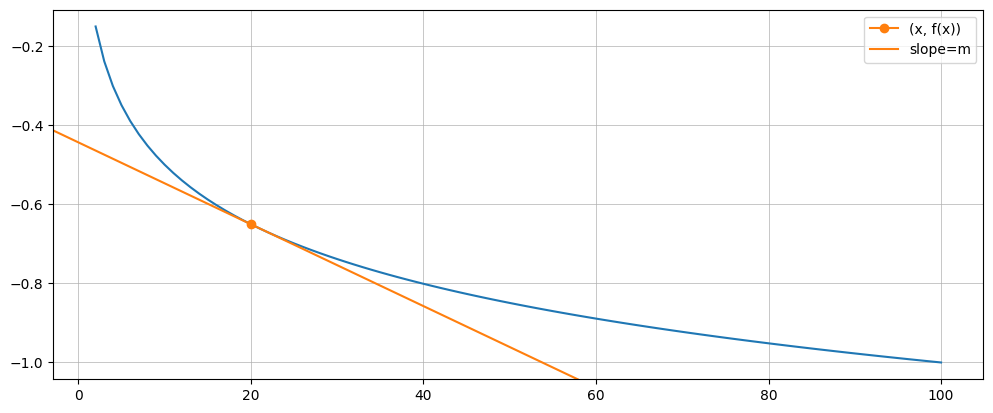

In [164]:
# Example of an approximation a derivative of log_1/2 with the difference quotient


h = 2
xs = [x for x in range(100, 1, -1)]
ys = [log_half(x) for x in xs]

plt.figure().set_figwidth(12)
plt.plot(xs, ys)
plt.plot(20, log_half(20), marker='o', label='(x, f(x))')
plt.axline([20, log_half(20)], slope=derivative(log_half, 20, h), c='C1', label='slope=m')
plt.grid(linewidth=0.5)
plt.legend()
plt.show()